<a href="https://www.kaggle.com/code/tusharaggarwal27/mobile-games-a-b-testing-with-cookie-cats?scriptVersionId=117961806" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#F5DEB3;
           font-size:170%;
           font-family:Helvetica, Sans-Serif;
           letter-spacing:0.5px">
<p style="padding: 10px;
          text-align: center;
          font-size:150%;
          color:blue;">
           🦿🤖Mobile Games A/B Testing with Cookie Cats🦿🤖
            
</p>
<style>
        h1{text-align: center;}
</style>  
    
</div>

<p style="font-family:cursive; font-size:15px; color:'darkcyan';">I brewed this notebook from scratch, If this notebook helped, please consider upvoting and cite me if sharing ,Thank you!</p>
<p style="width: 250px;padding: 15px;background: papayawhip;border-radius:10px;font-size:15px;border-radius:20px">
    <a href="https://www.linkedin.com/in/tusharaggarwalinseec/" target="_blank">Lets connect on LinkedIn!</a>
    
   </p>
<p style="width: 250px;padding: 15px;background: papayawhip;border-radius:10px;font-size:15px;border-radius:20px">
<a href="https://github.com/tushar2704" target="_blank">Follow me on Github too!</a> </p>
<p style="width:270px;padding: 15px;background: papayawhip;border-radius:10px;font-size:15px;border-radius:20px">
    <a href="https://medium.com/@tushar_aggarwal" target="_blank">Also checkout my Medium posts!</a>
    
   </p>

<div class="alert alert-info" role="alert" style="font-size:17px;border-radius:20px">
    <b>In this notebook, I am analyze the result of an A/B test where the first gate in Cookie Cats game was moved from level 30 to level 40</b>
   
  </div>

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
    <b>🦿🤖Cookie Cats🦿🤖</b>
</p>
   <p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px"> 
    <b>Some things to Note:</b><br>
    <b>1.</b><a href="https://www.facebook.com/cookiecatsgame">Cookie Cats</a> is a hugely popular mobile puzzle game developed by <a href="http://tactile.dk">Tactile Entertainment</a>. It's a classic "connect three"-style puzzle game where the player must connect tiles of the same color to clear the board and win the level. Check out this short demo:
    <a href="https://youtu.be/GaP5f0jVTWE"><img src="https://assets.datacamp.com/production/project_184/img/cookie_cats_video.jpeg" style="width: 500px"></a>
    <br><br><b>2. </b>As players progress through the levels of the game, they will occasionally encounter gates that force them to wait a non-trivial amount of time or make an in-app purchase to progress. In addition to driving in-app purchases, these gates serve the important purpose of giving players an enforced break from playing the game, hopefully resulting in that the player's enjoyment of the game being increased and prolonged.
    <br><img src="https://assets.datacamp.com/production/project_184/img/cc_gates.png" alt>
    <br><br><b>3. </b>
But where should the gates be placed? Initially the first gate was placed at level 30, but in this notebook I am going to analyze an AB-test where we moved the first gate in Cookie Cats from level 30 to level 40. In particular,a look at the impact on player retention.
</p>


<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:20px;border-radius:20px">Loading the data
    
   </p>

In [1]:
# Importing pandas
import pandas as pd

# Reading in the data
df = pd.read_csv("/kaggle/input/cookie-cats-game/cookie_cats.csv")

# Showing the first few rows
print(df.head())

   userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True


<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px"> 
<b>AB-test data:</b><br>The data we have is from 90,189 players that installed the game while the AB-test was running. The variables are:
<br><code>userid</code> - a unique number that identifies each player.
<br><code>version</code> - whether the player was put in the control group (<code>gate_30</code> - a gate at level 30) or the group with the moved gate (<code>gate_40</code> - a gate at level 40).
<br><code>sum_gamerounds</code> - the number of game rounds played by the player during the first 14 days after install.
<br><code>retention_1</code> - did the player come back and play <strong>1 day</strong> after installing?
<br><code>retention_7</code> - did the player come back and play <strong>7 days</strong> after installing?
<br>When a player installed the game, he or she was randomly assigned to either <code>gate_30</code> or <code>gate_40</code>.   
</p>


In [2]:
# Counting the number of players in each AB group.
print(df.groupby('version')['userid'].count())

version
gate_30    44700
gate_40    45489
Name: userid, dtype: int64


<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px"> 
<b>The distribution of game rounds</b><br><img src="https://assets.datacamp.com/production/project_184/img/mr_waffles_smiling.png" style="width:100px; float:left">
<br>It looks like there is roughly the same number of players in each group,
<br>The focus of this analysis will be on how the gate placement affects player retention  
</p>

Text(0, 0.5, 'userid')

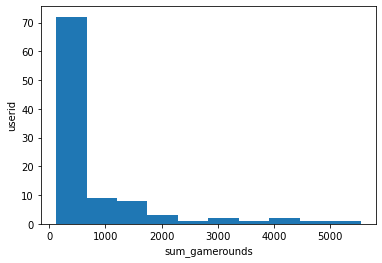

In [3]:
%matplotlib inline

# Counting the number of players for each number of gamerounds 
plot_df = df.groupby('sum_gamerounds')['userid'].count()

# Plotting the distribution of players that played 0 to 100 game rounds
ax = plot_df.head(n=100).plot(x='sum_gamegrounds',y='userid',kind='hist')
ax.set_xlabel("sum_gamerounds")
ax.set_ylabel("userid")

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px"> 
<b>Overall 1-day retention</b><br>
<br>&#8226; In the plot above we can see that some players install the game but then never play it (0 game rounds), some players just play a couple of game rounds in their first week, and some get really hooked!
<br>&#8226; What we want is for players to like the game and to get hooked. A common metric in the video gaming industry for how fun and engaging a game is <em>1-day retention</em>: The percentage of players that comes back and plays the game <em>one day</em> after they have installed it. The higher 1-day retention is, the easier it is to retain players and build a large player base.
</p>


In [4]:
# The % of users that came back the day after they installed
print(df['retention_1'].mean())

0.4452095044850259


<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px"> 
<b>1-day retention by AB-group</b><br>
    <img src="https://assets.datacamp.com/production/project_184/img/belle_cookie.png" style="width:100px; float:right"> 
<br>&#8226; A little less than half of the players come back one day after installing the game. Now that I have a benchmark, let's look at how 1-day retention differs between the two AB-groups.
</p>


In [5]:
# Calculating 1-day retention for each AB-group
print(df.groupby('version')['retention_1'].mean())

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64


<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px"> 
<b>Should we be confident in the difference?</b><br>
<br>&#8226; It appears that there was a slight decrease in 1-day retention when the gate was moved to level 40 (44.2%) compared to the control when it was at level 30 (44.8%). It's a small change, but even small changes in retention can have a large impact. But while we are certain of the difference in the data, how certain should we be that a gate at level 40 will be worse in the future?
    <br><br>&#8226; Now repeatedly re-sample our dataset (with replacement) and calculate 1-day retention for those samples 
</p>

<AxesSubplot:ylabel='Density'>

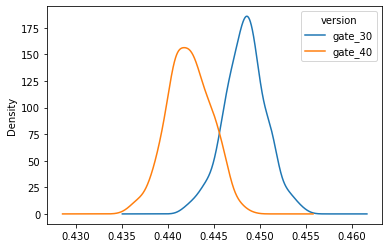

In [6]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(500):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# Plotting a Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='kde')

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px"> 
<b>Zooming in on the difference</b><br>
<br>&#8226; These two distributions above represent the bootstrap uncertainty over what the underlying 1-day retention could be for the two AB-groups. Just eyeballing this plot, we can see that there seems to be some evidence of a difference, albeit small. Let's zoom in on the difference in 1-day retention.
</p>


Text(0.5, 0, '% difference in means')

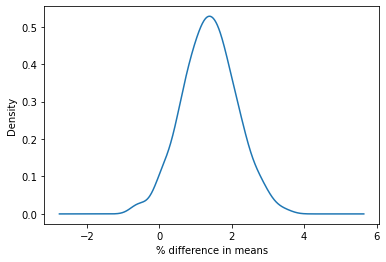

In [7]:
# Adding a column with the % difference between the two AB-groups
boot_1d['diff'] = (boot_1d['gate_30'] - boot_1d['gate_40']) /  boot_1d['gate_40'] * 100

# Ploting the bootstrap % difference
ax = boot_1d['diff'].plot(kind = 'kde')
ax.set_xlabel("% difference in means")

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px"> 
<b>Probability of a difference</b><br><img src="https://assets.datacamp.com/production/project_184/img/ziggy_smiling.png" style="width:100px; float:left">
<br>&#8226; From this chart, we can see that the most likely % difference is around 1% - 2%, and that most of the distribution is above 0%, in favor of a gate at level 30. But what is the <em>probability</em> that the difference is above 0%? Let's calculate that as well.
</p>


In [8]:
# Calculating the probability that 1-day retention is greater when the gate is at level 30
prob = (boot_1d['diff']>0.0).sum()/len(boot_1d)

# Pretty printing the probability
'{:.1%}'.format(prob)

'97.4%'

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px"> 
<b>7-day retention by AB-group</b><br><img src="https://assets.datacamp.com/production/project_184/img/ziggy_smiling.png" style="width:100px; float:left">
<br>&#8226; players have only been playing the game for one day, it is likely that most players haven't reached level 30 yet. That is, many players won't have been affected by the gate, even if it's as early as level 30.
    <br><br>&#8226; But after having played for a week, more players should have reached level 40, and therefore it makes sense to also look at 7-day retention. That is: What percentage of the people that installed the game also showed up a week later to play the game again.
</p>


In [9]:
# Calculating 7-day retention for both AB-groups
print(df.groupby('version')['retention_7'].mean())

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64


<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px"> 
<b>Bootstrapping the difference again</b><br>
<br>&#8226;  we see that 7-day retention is slightly lower (18.2%) when the gate is at level 40 than when the gate is at level 30 (19.0%). This difference is also larger than for 1-day retention, presumably because more players have had time to hit the first gate. We also see that the <em>overall</em> 7-day retention is lower than the <em>overall</em> 1-day retention; fewer people play a game a week after installing than a day after installing.
</p>

'100.0%'

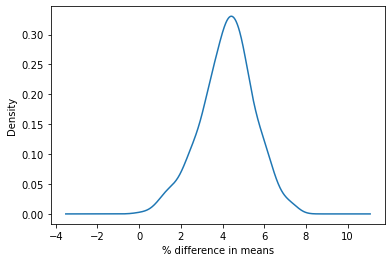

In [10]:
# Creating a list with bootstrapped means for each AB-group
boot_7d = []
for i in range(500):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_7d = pd.DataFrame(boot_7d)

# Adding a column with the % difference between the two AB-groups
boot_7d['diff'] = (boot_7d['gate_30'] - boot_7d['gate_40']) /  boot_7d['gate_30'] * 100

# Ploting the bootstrap % difference
ax = boot_7d['diff'].plot(kind = 'kde')
ax.set_xlabel("% difference in means")

# Calculating the probability that 7-day retention is greater when the gate is at level 30
prob = (boot_7d['diff'] > 0).sum() / len(boot_7d)

# Pretty printing the probability
'{:.1%}'.format(prob)

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px"> 
<b>The conclusion</b><br>
<br>&#8226;  The bootstrap result tells us that there is strong evidence that 7-day retention is higher when the gate is at level 30 than when it is at level 40. The conclusion is: If we want to keep retention high — both 1-day and 7-day retention — we should <strong>not</strong> move the gate from level 30 to level 40. There are, of course, other metrics we could look at, like the number of game rounds played or how much in-game purchases are made by the two AB-groups. But retention <em>is</em> one of the most important metrics. If we don't retain our player base, it doesn't matter how much money they spend in-game.
   <br> <br>&#8226; why is retention higher when the gate is positioned earlier? One could expect the opposite: The later the obstacle, the longer people are going to engage with the game. But this is not what the data tells us. The theory of <em>hedonic adaptation</em> can give one explanation for this. In short, hedonic adaptation is the tendency for people to get less and less enjoyment out of a fun activity over time if that activity is undertaken continuously. By forcing players to take a break when they reach a gate, their enjoyment of the game is prolonged. But when the gate is moved to level 40, fewer players make it far enough, and they are more likely to quit the game because they simply got bored of it. 
    <br><br><b>Therefore dont move the gate to level 40!</b>
</p>